In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
class_df = pd.read_csv('/kaggle/input/electrical-fault-detection-and-classification/classData.csv')
detect_df = pd.read_csv('/kaggle/input/electrical-fault-detection-and-classification/detect_dataset.csv')

In [3]:
class_df.head(7075)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7070,0,0,0,0,-60.139484,26.901767,30.143994,0.221023,-0.581831,0.360808
7071,0,0,0,0,-59.560123,25.906900,30.559797,0.229774,-0.582964,0.353190
7072,0,0,0,0,-58.968092,24.913656,30.961308,0.238465,-0.583948,0.345483
7073,0,0,0,0,-58.363538,23.922278,31.348429,0.247093,-0.584783,0.337690


> #Checking the summary of the dataset (if there are any null data then remove it)

In [4]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [5]:
class_df['Fault_type'] = class_df['G'].astype('str') + class_df['C'].astype('str') + class_df['B'].astype('str') + class_df['A'].astype('str')
                         

In [6]:
class_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [7]:
class_df['Fault_type'].unique()

array(['1001', '1011', '0110', '0111', '1111', '0000'], dtype=object)

Mapping the faults to a single value.
the mapping looks like this :
* **'0000': 0,     #no fault
* '1001': 1,     # LG fault (line A and G) 
* '1011': 2,     # LLG fault ( line A,B and G)
* '0110': 3,     # LL fault (line B and C)
* '0111': 4,     # LLL fault
* '1111': 5     # LLG fault**

In [8]:
fault_mapping = {
    '0000': 0,     #no fault
    '1001': 1,     # LG fault (line A and G) 
    '1011': 2,     # LLG fault ( line A,B and G)
    '0110': 3,     # LL fault (line B and C)
    '0111': 4,     # LLL fault
    '1111': 5     # LLLG fault
}

In [9]:
classes = ['No_Fault','LG','LLG','LL','LLL','LLLG']

In [10]:
class_df['Fault_type'] = class_df['Fault_type'].map(fault_mapping)

In [11]:
class_df.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_type
4441,1,1,1,1,-639.566210,-200.770129,840.542382,-0.023864,0.028151,-0.004286,5
2244,1,0,1,1,302.720677,-31.378933,42.624220,0.336171,-0.606389,0.270219,2
2958,0,1,1,0,-50.619911,762.041349,-708.943505,0.035403,-0.013320,-0.022083,3
6548,0,0,0,0,-25.319071,95.494209,-73.428019,-0.618860,0.295970,0.322890,0
2901,0,1,1,0,-69.489164,331.174664,-259.324504,-0.372167,-0.039696,0.411864,3


In [12]:
class_df['Fault_type'].value_counts()

0    2365
2    1134
5    1133
1    1129
4    1096
3    1004
Name: Fault_type, dtype: int64

# Creating the Dataset

In [13]:
X = class_df.drop(['Fault_type','G','C','B','A'], axis=1)
Y = class_df['Fault_type']

# Splitting the dataset into train and valid

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.2, random_state = 41)

# Model Building

# **Decision-Tree-Classifier**

In [16]:
X_train.head()

,Ia,Ib,Ic,Va,Vb,Vc
1397,769.263106,-41.206154,38.296864,0.035077,-0.370247,0.335170
5110,-141.272523,825.770930,-684.500671,0.033866,0.005094,-0.038961
3106,56.936190,-377.065285,322.691658,0.336959,0.038450,-0.375408
4318,558.925342,-564.131265,7.336038,0.027458,-0.476219,0.448761
7074,-57.746609,22.933011,31.721065,0.255658,-0.585469,0.329811


Accuracy of the Training dataset is :  100.0 %
Accuracy of the validation dataset is :  88.55689764780675 %


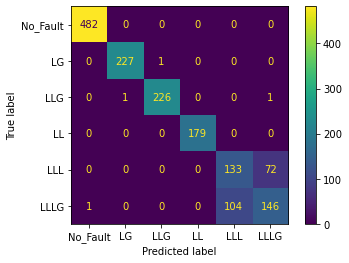

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
model_1 = DecisionTreeClassifier(criterion='entropy',splitter='best')
model_1.fit(X_train,Y_train)


#training acuracy
predicts_t1 = model_1.predict(X_train)
accuracy_t1 = (predicts_t1==Y_train).sum() / len(Y_train)
print('Accuracy of the Training dataset is : ',accuracy_t1*100,'%')

#validation accuracy
predicts_1 = model_1.predict(X_val)
accuracy_1 = (predicts_1==Y_val).sum() / len(Y_val)
print('Accuracy of the validation dataset is : ',accuracy_1*100,'%')

# Confusion Matrix
conf_mat_1 = confusion_matrix(predicts_1,Y_val)
disp = ConfusionMatrixDisplay(conf_mat_1,display_labels=classes)
disp.plot()

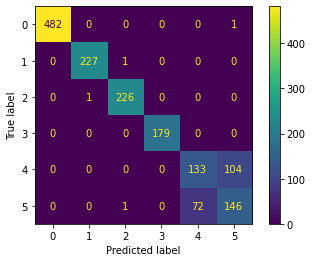

In [18]:
matrix_plt = plot_confusion_matrix(model_1,X_val,Y_val)

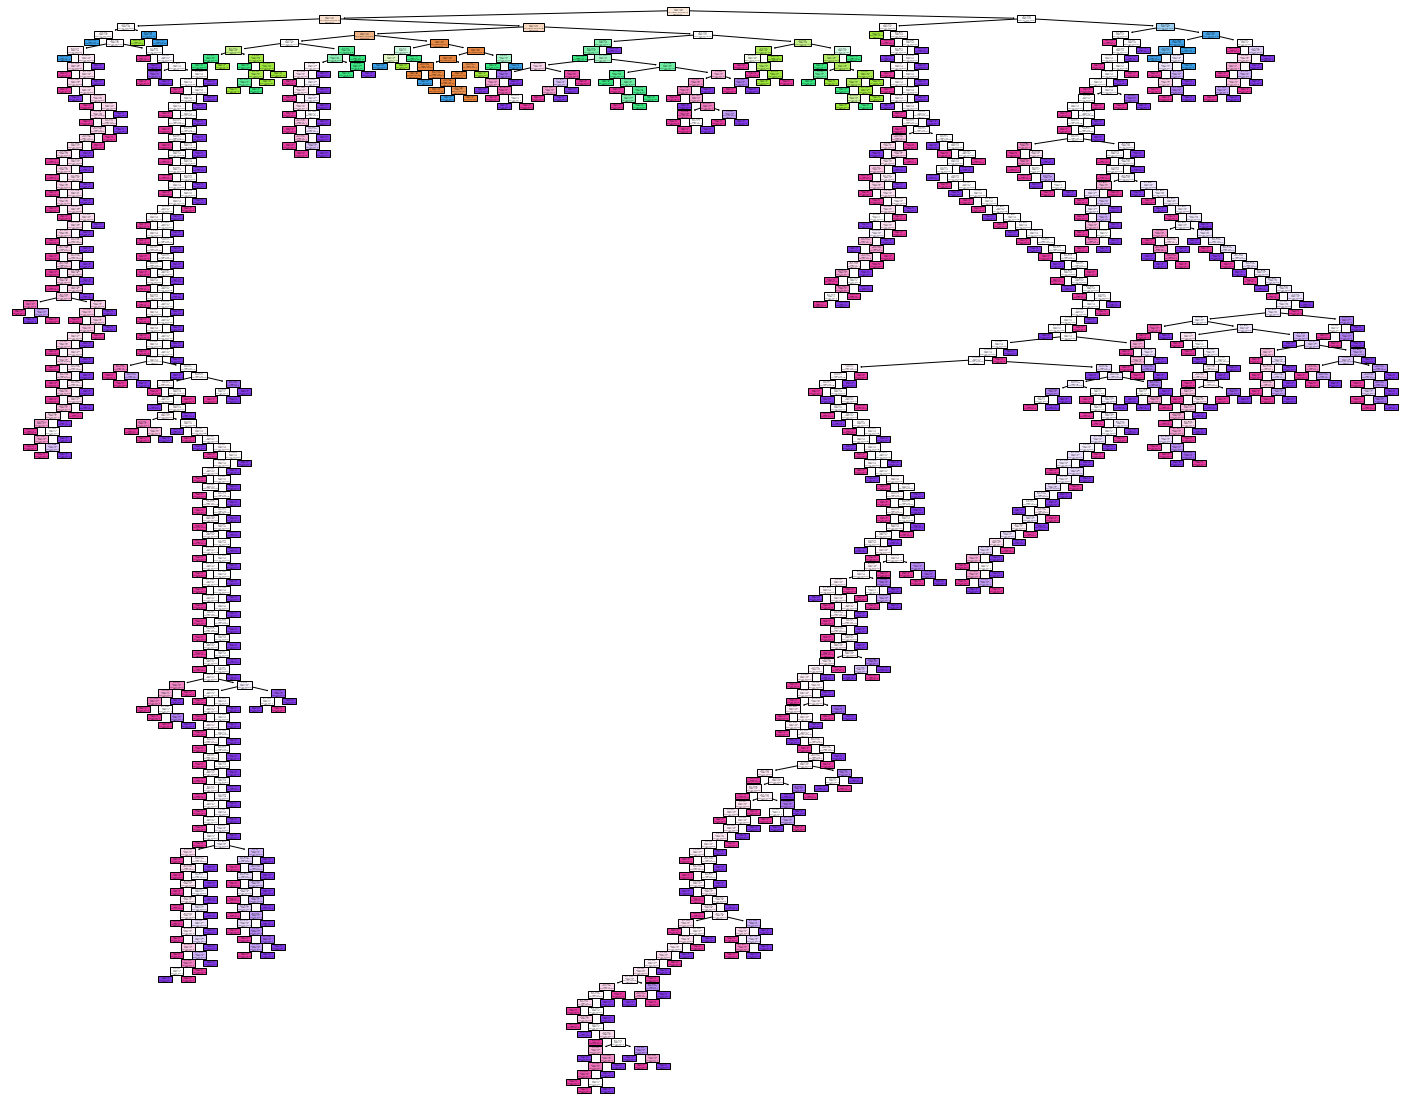

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_1, 
                   feature_names=X_train.columns,  
                   class_names={0:'No_Fault', 1: 'LG', 2:'LLG',3:'LL',4:'LLL',5:'LLG'},
                   filled=True)

In [20]:
fig.savefig("decistion_tree_depth_3.png")

# **Inferance**

Dictonray fo fault types

In [21]:
Fault_type = {0:'No Fault',
              1:'LG Fault',
              2:'LLG Fault',
              3:'LL Fault',
              4:'LLL Fault',
              5:'LLLG Fault' }

# This function will take a test dataframe or a single test data and return the predictions of the model

In [22]:
def inferance(test_input,model):
    st = type(test_input)
    
    if st==type(pd.DataFrame([[0]])):
        
        df = test_input
        p = model.predict(test_data)
    else:
        df = pd.DataFrame([[test_input[0],test_input[1],test_input[2],test_input[3],test_input[4],test_input[5]]],columns=['Ia','Ib','Ic','Va','Vb',"Vc"])
        p = model.predict([test_data])
    
    
    return p

In [23]:
# the test data
test_data = X_val.iloc[1000:1020]

print('--------------------------Predicted Fault type---------------------------------')
predictions = inferance(test_data,model_1)
for p in predictions:
    print('---',Fault_type[p.item()],'---')
    
    
# print('\n--------------------------Actual Fault type---------------------------------')

# # Actual predictions
# if type(test_data)==type(pd.DataFrame([[0]])):
#     for ind in test_data.index:
#         i = class_df['Fault_type'][ind]
#         print(i,'---------------------------------',Fault_type[i.item()])

--------------------------Predicted Fault type---------------------------------
--- LLLG Fault ---
--- LG Fault ---
--- No Fault ---
--- LLLG Fault ---
--- LLL Fault ---
--- No Fault ---
--- No Fault ---
--- No Fault ---
--- LG Fault ---
--- LG Fault ---
--- LLL Fault ---
--- LL Fault ---
--- LLG Fault ---
--- LL Fault ---
--- No Fault ---
--- LLLG Fault ---
--- LLL Fault ---
--- LG Fault ---
--- No Fault ---
--- No Fault ---


# Training with Feed Forward Neural Network

In [24]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import DataLoader,Dataset

In [25]:
# class NNmodel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(6,128)
#         self.fc2 = nn.Linear(128,256)
#         self.fc3 = nn.Linear(256,512)
#         self.fc4 = nn.Linear(512,1024)
#         self.fc5 = nn.Linear(1024,512)
#         self.fc6 = nn.Linear(512,128)
#         self.fc7 = nn.Linear(128,6)
        
#     def forward(self,x):
# #         print(x.shape)
#         x1 = F.relu(self.fc2(F.relu(self.fc1(x))))
# #         print(x1.shape)
#         x2 = F.relu(self.fc4(F.relu(self.fc3(x1))))
# #         print(x2.shape)
#         x3 = F.relu(self.fc6(F.relu(self.fc5(x2))))
# #         print(x3.shape)
#         x4 = self.fc7(x3)
# #         print(x4.shape)
        
#         return x4

        

In [26]:
# train_x = X_train.reset_index(drop=True)
# train_y = Y_train.reset_index(drop=True)
# val_x = X_val.reset_index(drop=True)
# val_y = Y_val.reset_index(drop=True)

In [27]:
# train_x.head()

In [28]:
# X_train.reset_index(drop=True).head()

In [29]:
# Y_train.head()

In [30]:
# Y_train.reset_index(drop=True)

In [31]:
# class FaultDataset(Dataset):
#     def __init__(self,df,label):
#         super().__init__()
#         self.df = df#.reset_index(drop=True)
#         self.label = label#.reset_index(drop=True)
        
#     def get_item(self,index):
#         data = torch.tensor(X_train.iloc[index].tolist())
#         label = torch.tensor(self.label[index])
#         return [data, label]
    
#     def __len__(self):
#         return len(self.df)

In [32]:
# type(FaultDataset(train_x,train_y).get_item(6284)[0])

In [33]:
# train_dataset = FaultDataset(train_x,train_y)
# val_dataset   = FaultDataset(val_x,val_y)

In [34]:
# train_dataset.__len__()

In [35]:
# train_loader = DataLoader(train_dataset,batch_size=8,shuffle=False,num_workers=2)
# val_loader = DataLoader(val_dataset,batch_size=8,shuffle=False,num_workers=2)

In [36]:
# class FaultDataloader():
#     def __init__(self,dataset,batch_size):
#         super().__init__()
#         self.dataset = dataset
#         self.batch_size = batch_size
# #         start = 0
# #         for i in range(int(dataset.__len__()/batch_size)):
# #             #print(type(dataset.get_item(start)[0]))
# #             data = torch.stack([dataset.get_item(start+j)[0] for j in range(7)])
# #             label = torch.stack([dataset.get_item(start+j)[1] for j in range(7)])
# #             start = start+7
            
# #             return [data,label]
        
#     def get_data(self):
#         data = []
#         label = []
#         start = 0
#         for i in range(int(self.dataset.__len__()/self.batch_size)):
#             #print(type(dataset.get_item(start)[0]))
#             temp_data = torch.stack([self.dataset.get_item(start+j)[0] for j in range(8)])
#             temp_label = torch.stack([self.dataset.get_item(start+j)[1] for j in range(8)])
#             start = start+8
#             data.append(temp_data)
#             label.append(temp_label)
#         return [torch.stack(data), torch.stack(label)]

In [37]:
# train_loader = FaultDataloader(train_dataset,batch_size=8)
# val_loader = FaultDataloader(val_dataset,batch_size=8)

In [38]:
# data_train , label_train = train_loader.get_data()

# data_val , label_val = val_loader.get_data()

In [39]:
# from tqdm.notebook import tqdm

In [40]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [41]:
# model = NNmodel()
# model = model.to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(),lr = .01)

In [42]:
# model

In [43]:
# a = nn.functional.normalize(data_train[1],p=1,dim=1)
# ouput = model(a)


# print(torch.max(nn.functional.softmax(ouput),1))
# print(label_train[1])

# print(criterion(ouput,label_train[1]))

In [44]:
# num_epochs = 20

In [45]:
# for epoch in range(num_epochs):
#     for i in tqdm(range(len(data_train))):
#         data = nn.functional.normalize(data_train[i]).to(device)
#         label = label_train[i].to(device)

#         #forward pass
#         outputs = model(data)
# #         _, labels = torch.max(targets, dim=1)
#         loss = criterion(outputs,label)

#         #back pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if (i+1)%100 == 0:
            
#             print(f'epoch {epoch+1}/{num_epochs} , step {i+1}/{len(data_train)}, loss = {loss.item():.4f}')


In [46]:
# n_correct =0
# n_samples = 0
# with torch.no_grad():
#     for i in tqdm(range(len(data_val))):
#         data = data_val[i].to(device)
#         label = label_val[i].to(device)

#         #forward pass
#         outputs = model(data)
#         outputs = nn.Sigmoid()(outputs)
# #         print(outputs)
#         _, predicts = torch.max(outputs,1)
#         print(predicts)
#         val_loss = criterion(outputs,label)

#         n_correct += (predicts==label).sum().item()
#         n_samples += label.size(0)
#     acc = 100*n_correct/n_samples
#     print(f'Accuracy of the validation data is {acc}%')